## DATA UNDERSTANDING OF CUSTOMER CHURN

LINK DATASET : https://www.kaggle.com/datasets/synful/churn-data/data

In [ ]:
#import module that we need
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [5]:
#load the data!
df = pd.read_csv('Churn_Modelling.csv')

In [6]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


  "Tenure" typically refers to the amount of time an individual has held a particular position, especially in the context of employment or academic positions. It is a measure of how long someone has been in a specific role or job.

Exited :  represents whether a customer has exited or churned, The "Exited" column likely contains binary values, where:

1 may indicate that the customer has exited or churned.
0 may indicate that the customer has not exited or is still active.

## Feature Engineering

In [8]:
# Sample DataFrame with a categorical column

# Using LabelEncoder
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Geography'] = label_encoder.fit_transform(df['Geography'])

print(df)

      RowNumber  CustomerId    Surname  CreditScore  Geography  Gender  Age  \
0             1    15634602   Hargrave          619          0       0   42   
1             2    15647311       Hill          608          2       0   41   
2             3    15619304       Onio          502          0       0   42   
3             4    15701354       Boni          699          0       0   39   
4             5    15737888   Mitchell          850          2       0   43   
...         ...         ...        ...          ...        ...     ...  ...   
9995       9996    15606229   Obijiaku          771          0       1   39   
9996       9997    15569892  Johnstone          516          0       1   35   
9997       9998    15584532        Liu          709          0       0   36   
9998       9999    15682355  Sabbatini          772          1       1   42   
9999      10000    15628319     Walker          792          0       0   28   

      Tenure    Balance  NumOfProducts  HasCrCard  

In [9]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,2,1,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,0,1,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,1,0,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,0,1,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,0,1,27,2,134603.88,1,1,1,71725.73,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  int64  
 5   Gender           10000 non-null  int64  
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(11), object(1)
memory usage: 1.1+ MB


In [11]:
df = df.drop('Surname', axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  int64  
 4   Gender           10000 non-null  int64  
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 1015.8 KB


In [13]:
#check if there any missing value
missing_values = df.isnull().sum()

if missing_values.sum() == 0:
    print("There are no missing values in the dataset.")
else:
    print("There are missing values in the dataset.")
    print(missing_values)

There are no missing values in the dataset.


In [14]:
df.describe()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,0.746300,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,0.827529,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,0.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,1.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## EDA

In [15]:
#value counts of m/f in the dataset, close to 1000 more males than females
df.Gender.value_counts()

1    5457
0    4543
Name: Gender, dtype: int64

In [16]:
#value counts of the 3 countries in the dataset, Germany and Spain have close to equal amounts, with France having twice the amount
df.Geography.value_counts()

0    5014
1    2509
2    2477
Name: Geography, dtype: int64

In [17]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

REMEMBER!  
1 may indicate that the customer has exited or churned.
0 may indicate that the customer has not exited or is still active.

so from the output we can see that 20 % of the data contains customers that have churned/exited

in any case you asking how to count it
below is the code to count it
total_customers = df.shape[0]
churned_customers = df['Exited'].sum()

churn_percentage = (churned_customers / total_customers) * 100
print(f"Churn Percentage: {churn_percentage:.2f}%")


In [18]:
total_customers = df.shape[0]
churned_customers = df['Exited'].sum()

churn_percentage = (churned_customers / total_customers) * 100
print(f"Churn Percentage: {churn_percentage:.2f}%")

Churn Percentage: 20.37%


In [19]:
#check mean for age, balance, creditscore, estimatedsalary, and tenure

print ('Mean Age :',   round(df.Age.mean(), 2))
print ('Mean Balance :',    round(df.Balance.mean(), 2))
print ('Mean CreditScore :',    round(df.CreditScore.mean(), 2))
print ('Mean EstimatedSalary :',    round(df.EstimatedSalary.mean(), 2))
print ('Mean Tenure :',    round(df.Tenure.mean(), 2))

Mean Age : 38.92
Mean Balance : 76485.89
Mean CreditScore : 650.53
Mean EstimatedSalary : 100090.24
Mean Tenure : 5.01


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>],
       [<Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'EstimatedSalary'}>],
       [<Axes: title={'center': 'Balance'}>, <Axes: >]], dtype=object)

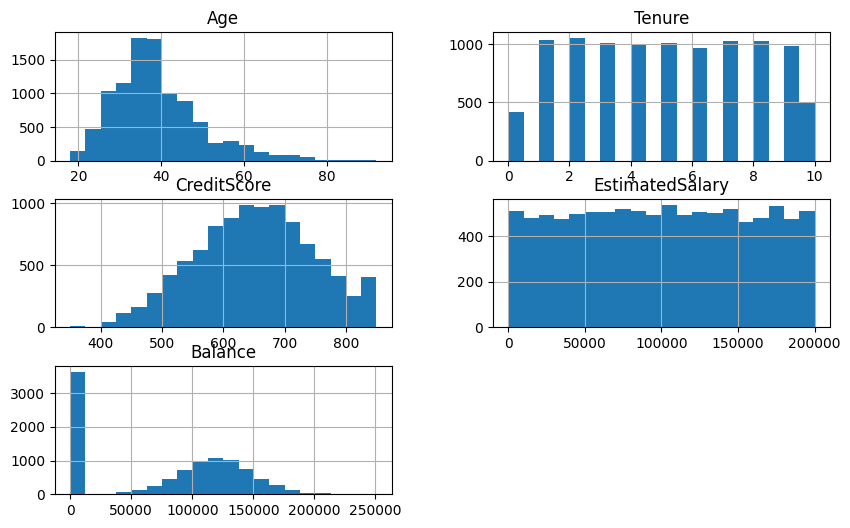

In [20]:
#plot histogram showing frequency distibution of above columns
df[['Age', 'Tenure', 'CreditScore', 'EstimatedSalary', 'Balance']].hist(bins=20,figsize=(10,6))

mean age of customers is 39
mean credit score is 650
mean tenure being 5 years as a customer.
mean balance is 76485.89, however 3500 of the 10 000 customers have a zero balance.

In [21]:
#next we group the data by churned/exited, 1 = churned/exited
grp = df.groupby('Exited')

#means of those customers that left vs those staying
grp[['Age', 'Tenure', 'CreditScore', 'EstimatedSalary', 'Balance']].mean()

#the mean age of customers leaving is about 8 years older than customers that are staying. the other column with a
#large differnce of mean is the balance column

,Age,Tenure,CreditScore,EstimatedSalary,Balance
Exited,,,,,
0,37.408389,5.033279,651.853196,99738.391772,72745.296779
1,44.837997,4.932744,645.351497,101465.677531,91108.539337


<Axes: ylabel='Exited,Gender'>

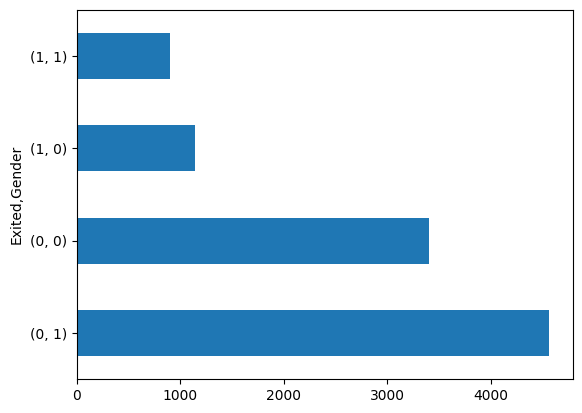

In [22]:
#value counts of m/f that have stayed and that have churned
grp.Gender.value_counts()

#as noted earlier males make up majority of the customers, however there are more females exiting than males

#percentage exiting by gender
df['Exited'].groupby(df['Gender']).sum()/ df.Gender.value_counts()
#16 % of males are leaving, compared with 25 % of females

#plot the above value count
grp.Gender.value_counts().plot(kind='barh')

In [23]:
#sums of those exited by geography and gender
df.groupby(['Geography', 'Gender'])[['Exited']].sum()

Exited
Geography Gender        
0         0          460
          1          350
1         0          448
          1          366
2         0          231
          1          182

In [24]:
#majority of those exited only had a single product before leaving
df.groupby(['NumOfProducts'])[['Exited']].sum()

,Exited
NumOfProducts,
1,1409
2,348
3,220
4,60


<Axes: xlabel='Exited', ylabel='Age'>

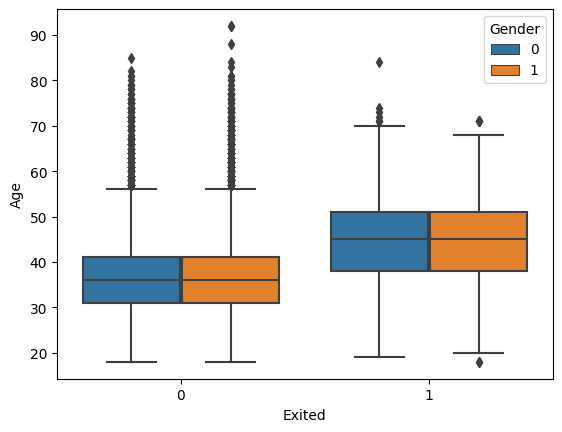

In [25]:
#plot mean age by m/f that have exited
sns.boxplot(data=df,y='Age', x='Exited', hue='Gender')

#confirms higher mean age of those that exited vs stayed

In [26]:
#mean ages of those exited per country
df.pivot_table('Age', index='Geography', columns='Exited', aggfunc='mean')

Exited,0,1
Geography,,
0,37.235966,45.133333
1,37.311504,44.894349
2,37.839147,44.147700




From the data it appears that the mean age of those exiting is 45 vs 37 for staying customers.

There is a higher number of females exiting, 25 % vs 16 % of males.

From the 3 countries, Germany has the highest churn with 32 % of customers leaving vs 16 % each for the other 2 countries.

Majority of customers that are leaving have only tried 1 product.

Further data and analysis may be needed to find out the reasons for the above exits/churn.



## Test the correlation with the label (Exited).

In [27]:
correlation_table = df.corr()

# Print or display the correlation table
print(correlation_table)

                 RowNumber  CustomerId  CreditScore  Geography    Gender  \
RowNumber         1.000000    0.004202     0.005840  -0.010358  0.018196   
CustomerId        0.004202    1.000000     0.005308   0.006516 -0.002641   
CreditScore       0.005840    0.005308     1.000000   0.007888 -0.002857   
Geography        -0.010358    0.006516     0.007888   1.000000  0.004719   
Gender            0.018196   -0.002641    -0.002857   0.004719  1.000000   
Age               0.000783    0.009497    -0.003965   0.022812 -0.027544   
Tenure           -0.006495   -0.014883     0.000842   0.003739  0.014733   
Balance          -0.009067   -0.012419     0.006268   0.069408  0.012087   
NumOfProducts     0.007246    0.016972     0.012238   0.003972 -0.021859   
HasCrCard         0.000599   -0.014025    -0.005458  -0.008523  0.005766   
IsActiveMember    0.012044    0.001665     0.025651   0.006724  0.022544   
EstimatedSalary  -0.005988    0.015271    -0.001384  -0.001369 -0.008112   
Exited      

            Feature  Importance
5               Age    0.207739
8     NumOfProducts    0.117680
11  EstimatedSalary    0.109003
7           Balance    0.103739
1        CustomerId    0.103503
2       CreditScore    0.095296
0         RowNumber    0.091636
10   IsActiveMember    0.063934
6            Tenure    0.052064
3         Geography    0.029687
4            Gender    0.014044
9         HasCrCard    0.011674


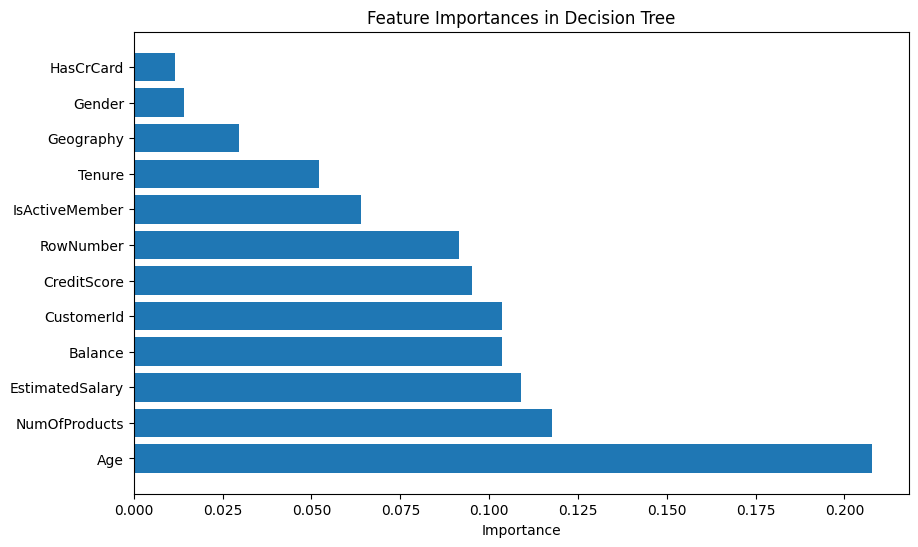

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'target' is the target variable
# X should be your feature matrix, excluding the target variable
X = df.drop('Exited', axis=1)
y = df['Exited']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the classifier on the training data
clf.fit(X_train, y_train)

# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print(feature_importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances in Decision Tree')
plt.show()


From this plot we can choose the features that you want according their importance

## Moddeling with Decision Tree

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import pandas as pd

# Features and target variable
X = df[['Geography', 'Gender']]
y = df['Exited']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8035


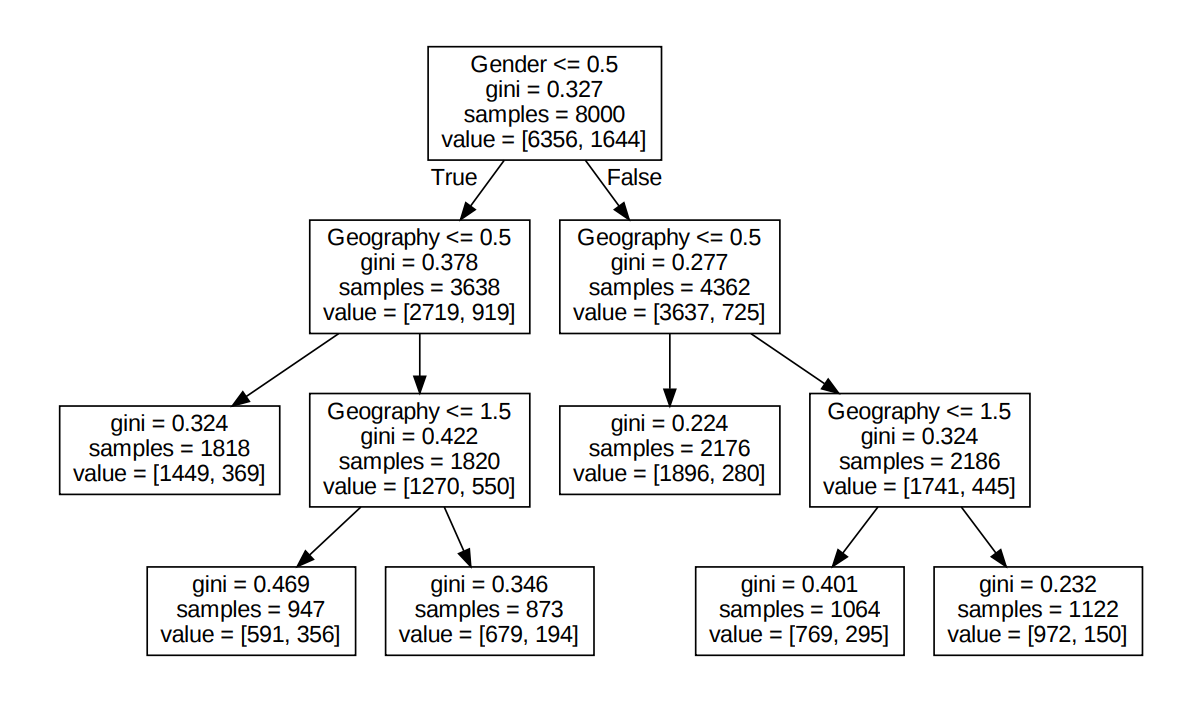

## Random Forest Forecasting

In [30]:
# Split the independent variable from the dataset
y = df['Exited']
X = df.drop('Exited', axis=1)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Pisahkan data menjadi train set dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Latih model pada train set
rf_model.fit(X_train, y_train)

# Prediksi label pada test set
y_pred = rf_model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi Model Random Forest:", accuracy)

# Tampilkan laporan klasifikasi
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))


Akurasi Model Random Forest: 0.8635
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.76      0.44      0.56       393

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.74      2000
weighted avg       0.85      0.86      0.85      2000



In [32]:
# Accessing feature importance from the Random Forest model
feature_importance = rf_model.feature_importances_

# Creating a DataFrame to display feature importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sorting the DataFrame based on their importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Fitur Importance:\n", importance_df)


Fitur Importance:
             Feature  Importance
5               Age    0.212303
8     NumOfProducts    0.124077
7           Balance    0.102457
1        CustomerId    0.101287
0         RowNumber    0.100718
11  EstimatedSalary    0.100157
2       CreditScore    0.099946
6            Tenure    0.058573
10   IsActiveMember    0.040444
3         Geography    0.030575
4            Gender    0.015288
9         HasCrCard    0.014175


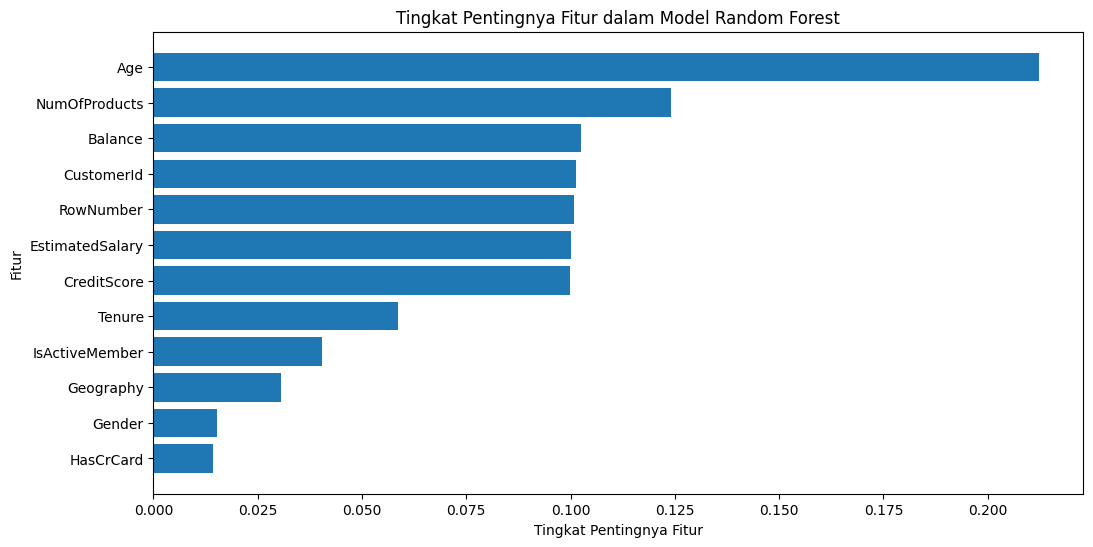

In [33]:
# Retrieve feature data and their importance
features = importance_df['Feature']
importance = importance_df['Importance']

# Plotting feature importance
plt.figure(figsize=(12, 6))
plt.barh(features, importance)
plt.xlabel('Tingkat Pentingnya Fitur')
plt.ylabel('Fitur')
plt.title('Tingkat Pentingnya Fitur dalam Model Random Forest')
plt.gca().invert_yaxis()
plt.show()


# So, in the plot above, we can see that Age is the feature with the highest level of importance in this random forest model.

# However, one thing to note is that the representation in this plot doesn't mean that other variables are not important. It's specific to the problem or model we are currently using.

In [ ]:
# Here is an example code for hyperparameter optimization and model validation in the Random Forest model using cross-validation techniques with the scikit-learn library.

from sklearn.model_selection import GridSearchCV, cross_val_score

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# List of hyperparameters to be optimized
param_grid = {
    'n_estimators': [50, 100, 200],  # Jumlah pohon
    'max_depth': [None, 10, 20, 30],  # Kedalaman pohon
    'min_samples_split': [2, 5, 10],  # Jumlah sampel minimum untuk split
    'min_samples_leaf': [1, 2, 4]  # Jumlah sampel minimum di ujung cabang
}

# Initialize GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform hyperparameter search with cross-validation
grid_search.fit(X, y)

# Display the optimal hyperparameter results
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


In [ ]:
# Evaluate the model performance with the optimal result
best_rf_model = RandomForestClassifier(random_state=42, **best_params)
cross_val_scores = cross_val_score(best_rf_model, X, y, cv=5, scoring='accuracy')
print("Accuracy with the Optimal Model:", cross_val_scores.mean())